In [3]:
#━━━━━━━━━❮Bibliotecas❯━━━━━━━━━
import os # sistema operacional
import cv2     # visao computacional
import math 
import geocoder
import requests
%matplotlib inline
import pandas as pd
from twilio.rest import Client
from geopy.geocoders import Nominatim
from keras.preprocessing import image   # pre processamento de imagens
import numpy as np   
from keras.utils import np_utils
from matplotlib import pyplot as plt 
from skimage.transform import resize   # redimensionamento de imagens
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split  # treino e teste split
from keras.models import Sequential
from keras.applications.vgg16 import VGG16 # modelo de rede neural
from keras.layers import Dense, InputLayer, Dropout
#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━

In [4]:
count = 0
videoFile = "Accidents.mp4"
cap = cv2.VideoCapture(videoFile)   # lendo o video pelo caminho
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #frame atual
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="%d.jpg" % count;count+=1
        
        cv2.imwrite(filename, frame)
cap.release()
print ("Feito!")

Feito!


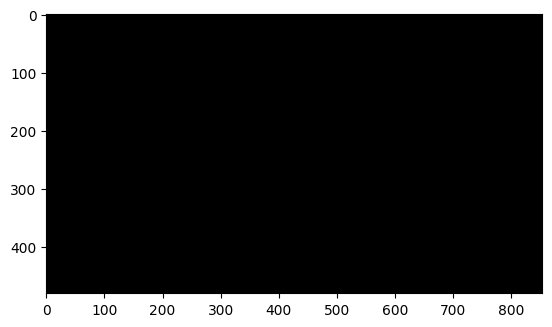

In [5]:
img = plt.imread('0.jpg')   # lendo imagem
plt.imshow(img)

In [6]:
data = pd.read_csv('mapping.csv')     # leitura do csv
data.head()

,Image_ID,Class
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [7]:
X = [ ]     # array vazio
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # alocando cada imagem no array X
X = np.array(X)    # convertendo lista para array

In [8]:
y = data.Class
dummy_y = np_utils.to_categorical(y)

In [9]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # remodelando para 224*224*3
    image.append(a)
X = np.array(image)

In [10]:
X = preprocess_input(X,data_format=None)

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

In [13]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

3/3 [==============================] - 10s 3s/step


((155, 7, 7, 512), (67, 7, 7, 512))

In [14]:
X_train = X_train.reshape(155, 7*7*512)      # convertendo para 1-D
X_valid = X_valid.reshape(67, 7*7*512)

In [15]:
train = X_train/X_train.max()      # centralizando dados
X_valid = X_valid/X_train.max()

In [16]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
5/5 [==============================] - 3s 433ms/step - loss: 0.7691 - accuracy: 0.5677 - val_loss: 0.7078 - val_accuracy: 0.6567
Epoch 2/100
5/5 [==============================] - 2s 379ms/step - loss: 0.3179 - accuracy: 0.8516 - val_loss: 0.7563 - val_accuracy: 0.7164
Epoch 3/100
5/5 [==============================] - 2s 354ms/step - loss: 0.1929 - accuracy: 0.9419 - val_loss: 0.7537 - val_accuracy: 0.6716
Epoch 4/100
5/5 [==============================] - 2s 355ms/step - loss: 0.1141 - accuracy: 0.9742 - val_loss: 0.7468 - val_accuracy: 0.7612
Epoch 5/100
5/5 [==============================] - 2s 349ms/step - loss: 0.0695 - accuracy: 1.0000 - val_loss: 0.7717 - val_accuracy: 0.7313
Epoch 6/100
5/5 [==============================] - 2s 370ms/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 0.7842 - val_accuracy: 0.7463
Epoch 7/100
5/5 [==============================] - 2s 356ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.7903 - val_accuracy: 0.7612
Epoch 8/100
5

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
count = 0
videoFile = "Accident-1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #frame atual
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Feito!")

Feito!


In [22]:
test = pd.read_csv('test.csv')

In [23]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [24]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [25]:
# pre processamento de imagem
test_image = preprocess_input(test_image, data_format=None)

# extraindo features de imagem usando modelo pre treinado
test_image = base_model.predict(test_image)
test_image.shape

1/1 [==============================] - 1s 1s/step


(9, 7, 7, 512)

In [26]:
test_image = test_image.reshape(9, 7*7*512)

# imagens não centralizadas
test_image = test_image/test_image.max()

In [27]:
predictions = model.predict(test_image)

1/1 [==============================] - 0s 76ms/step


In [28]:
print(predictions)

[[1.8073620e-06 9.9999821e-01]
 [1.0274997e-04 9.9989724e-01]
 [1.0689594e-03 9.9893099e-01]
 [5.6450575e-04 9.9943548e-01]
 [1.3695421e-03 9.9863052e-01]
 [3.7369764e-01 6.2630236e-01]
 [6.7421341e-01 3.2578659e-01]
 [4.9420998e-01 5.0579000e-01]
 [7.7524590e-01 2.2475408e-01]]


In [29]:
for i in range (0,9):
    if predictions[i][0]<predictions[i][1]:
        print("Sem acidente")
    else:
        print("Acidente detectado")
    

Sem acidente
Sem acidente
Sem acidente
Sem acidente
Sem acidente
Sem acidente
Acidente detectado
Sem acidente
Acidente detectado


In [30]:
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)
account_sid = 'ACa583032405cbf44ef280fccae8db749e'
auth_token = '63c142d6137d1a67e46e93e2ecfc29a6'
client = Client(account_sid, auth_token)

In [31]:
cap = cv2.VideoCapture('Accident-1.mp4')
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            predict="Sem acidente"
        else:
            predict="Acidente"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    client.messages.create(
        body="Acidente detectado em "+locname.address,
        from_= +16812025635,
        to= +5511950602005)

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()


TwilioRestException: HTTP 401 error: Unable to create record: Authenticate

: 